In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
from scipy.stats import cauchy
import os
os.chdir('../')
from python_code import optimizations as opt

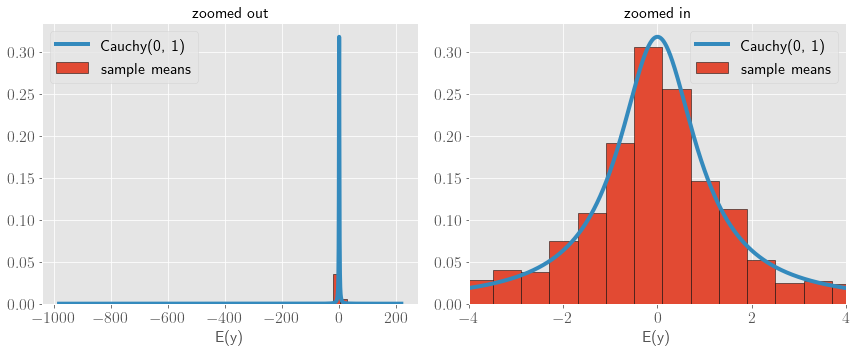

In [11]:
n, B = 20, 1000
dist = cauchy(loc=0, scale=1)
means = dist.rvs(size=(n, B)).mean(axis=0)
x = np.linspace(means.min(), means.max(), 500000)

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].hist(means, bins=50, edgecolor='black', density=True, label='sample means')
ax[0].set_title('zoomed out')
ax[0].plot(x, dist.pdf(x), label='Cauchy(0, 1)')

ax[1].hist(means, bins=2000, edgecolor='black', density=True, label='sample means')
ax[1].set_title('zoomed in')
ax[1].plot(x, dist.pdf(x), label='Cauchy(0, 1)')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('E(y)')
ax[1].set_xlabel('E(y)')
ax[1].set_xlim(-4, 4)
fig.tight_layout()
plt.savefig('figures/cauchy_mean.png', dpi=300, bbox_inches='tight')

In [3]:
observed_data = np.array([7.52, 9.92, 9.52, 21.97, 8.39, 8.09, 9.22, 9.37, 7.33, 15.32, 1.08, 8.51, 17.73, 11.20, 8.33, 10.83, 12.40, 14.49, 9.44, 3.67])

\begin{align} log L(\theta) &= log \prod_{i=1}^n \frac{1}{\pi}\frac{1}{1+(y_i-\theta)^2} \\
&= \sum_{i=1}^n log \frac{1}{\pi}\frac{1}{1+(y_i-\theta)^2} \end{align}
\begin{align} \frac{d}{d\theta}log L(\theta) &= \frac{d}{d\theta}\sum_{i=1}^n log \frac{1}{\pi}\frac{1}{1+(y_i-\theta)^2} \\
&=  \sum_{i=1}^n   \frac{2(y_i-\theta)}{1+(y_i-\theta)^2}\end{align}

\begin{align} H(\theta) &=\sum_{i=1}^n   \frac{2(y_i-\theta)}{1+(y_i-\theta)^2} \\
&=  \sum_{i=1}^n   \frac{2(\theta^2-2y_i\theta+y_i^2-1)}{[1+(y_i-\theta)^2]^2} \end{align}




In [14]:
ga = opt.GradientAscent(y_obs=observed_data)
print(ga.fit())
sga = opt.StochasticGradientAscent(y_obs=observed_data)
print(sga.fit())
nt = opt.NewtonMethod(y_obs=observed_data)
print(nt.fit());

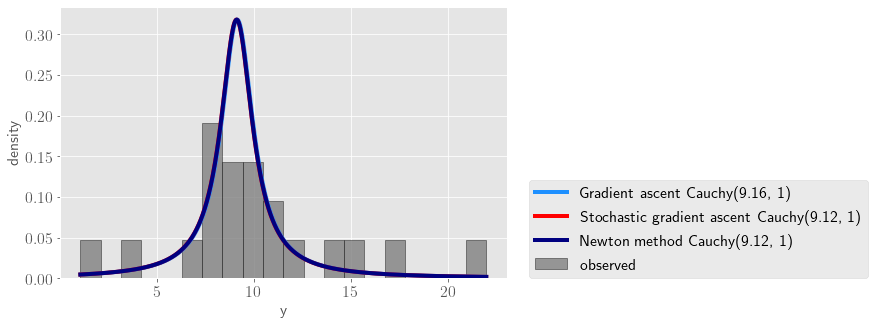

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(observed_data, edgecolor='black', alpha=.8, density=True, bins=20, label='observed', color='gray')
x = np.linspace(observed_data.min(), observed_data.max(), 1000)
plt.plot(x, cauchy(ga.optimal_theta, 1).pdf(x), label=f'Gradient ascent Cauchy({np.round(ga.optimal_theta, 2)}, 1)', color='dodgerblue')
plt.plot(x, cauchy(sga.optimal_theta, 1).pdf(x), label=f'Stochastic gradient ascent Cauchy({np.round(sga.optimal_theta, 2)}, 1)', color='red')
plt.plot(x, cauchy(nt.optimal_theta, 1).pdf(x), label=f'Newton method Cauchy({np.round(nt.optimal_theta, 2)}, 1)', color='navy')
plt.legend(loc=(1.05, 0))
plt.xlabel('y')
plt.ylabel('density')
plt.savefig('figures/mle_cauchy.png', dpi=300, bbox_inches='tight')


In [6]:
thetas = np.linspace(observed_data.min(), observed_data.max(), 1000)
log_likes = np.array([ga.calculate_log_likelihood(theta, observed_data) for theta in thetas])

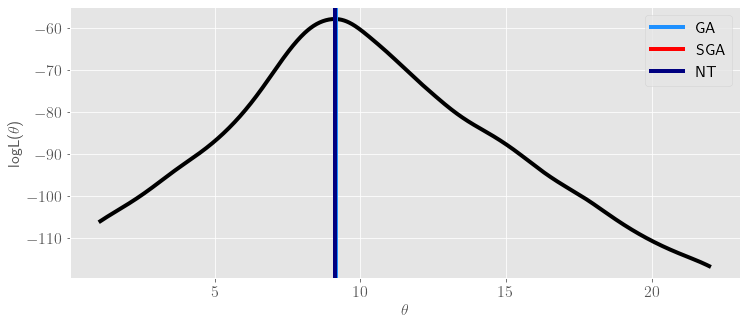

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(thetas, log_likes, color='black')
plt.xlabel(r'$\theta$')
plt.ylabel(r'logL($\theta$)')
plt.axvline(x=ga.optimal_theta, color='dodgerblue', label='GA')
plt.axvline(x=sga.optimal_theta, color='red', label='SGA')
plt.axvline(x=nt.optimal_theta, color='navy', label='NT')
plt.legend()
plt.savefig('figures/cauchy_loglike.png', dpi=300, bbox_inches='tight')

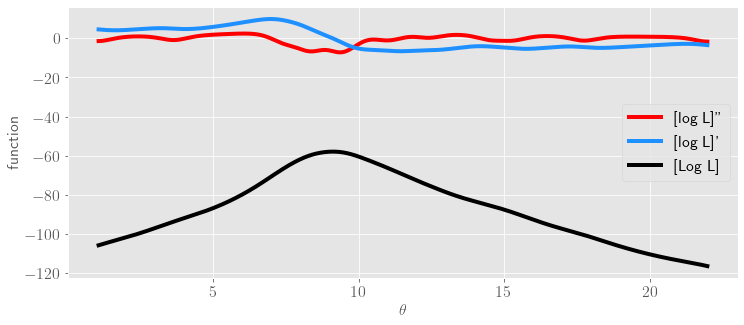

In [8]:
plt.figure(figsize=(12, 5))
hessians = np.array([nt.calculate_hessian(theta, observed_data) for theta in thetas])
log_like = np.array([nt.calculate_derivative_log_likelihood(theta, observed_data) for theta in thetas])
like = np.array([nt.calculate_log_likelihood(theta, observed_data) for theta in thetas])
plt.plot(thetas, hessians, color='red', label="[log L]''")
plt.plot(thetas, log_like, color='dodgerblue', label="[log L]'")
plt.plot(thetas, like, color='black', label="[Log L]")
plt.xlabel(r'$\theta$')
plt.ylabel(r'function')
plt.legend()
plt.savefig('figures/cauchy_fns.png', dpi=300, bbox_inches='tight')
# log likelihood is NOT concave! not strictly negative!!